In [ ]:
import json
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [ ]:

times = 5
# 讀取檔案
with open(f'/content/drive/MyDrive/Colab Notebooks/NEWDATASET/{times}.json', 'r') as file:
    jsonfile = json.load(file)

# 檔案結構
jsonfile

{'UID': 'subject5',
 'age': 22,
 'weight': 54,
 'height': 165,
 'data_PPG': [1999,
  1999,
  2002,
  2002,
  2002,
  2003,
  2002,
  2003,
  2008,
  2008,
  2008,
  2008,
  2008,
  2008,
  2008,
  2011,
  2010,
  2011,
  1535,
  2012,
  2012,
  2013,
  2015,
  2018,
  2018,
  2018,
  2019,
  2022,
  2022,
  2024,
  2022,
  2025,
  2026,
  2026,
  2026,
  2027,
  2030,
  2031,
  2029,
  2034,
  2034,
  2038,
  2038,
  2038,
  2042,
  2042,
  2042,
  2050,
  2046,
  2050,
  2051,
  2054,
  2056,
  2058,
  2060,
  2062,
  2066,
  2067,
  2067,
  2074,
  2074,
  2078,
  2078,
  2082,
  2083,
  2088,
  2091,
  2092,
  2096,
  2098,
  2099,
  2106,
  2106,
  2107,
  2112,
  2115,
  2115,
  2120,
  2122,
  2123,
  2126,
  2130,
  2136,
  2136,
  2139,
  2142,
  2143,
  2143,
  2152,
  2154,
  2159,
  2159,
  2162,
  2168,
  2168,
  2170,
  2176,
  2176,
  2178,
  2184,
  2184,
  2187,
  2190,
  2194,
  2200,
  2200,
  2202,
  2203,
  2206,
  2207,
  2214,
  2207,
  2217,
  2217,
  2222,
  222

In [ ]:
len(jsonfile)

358739

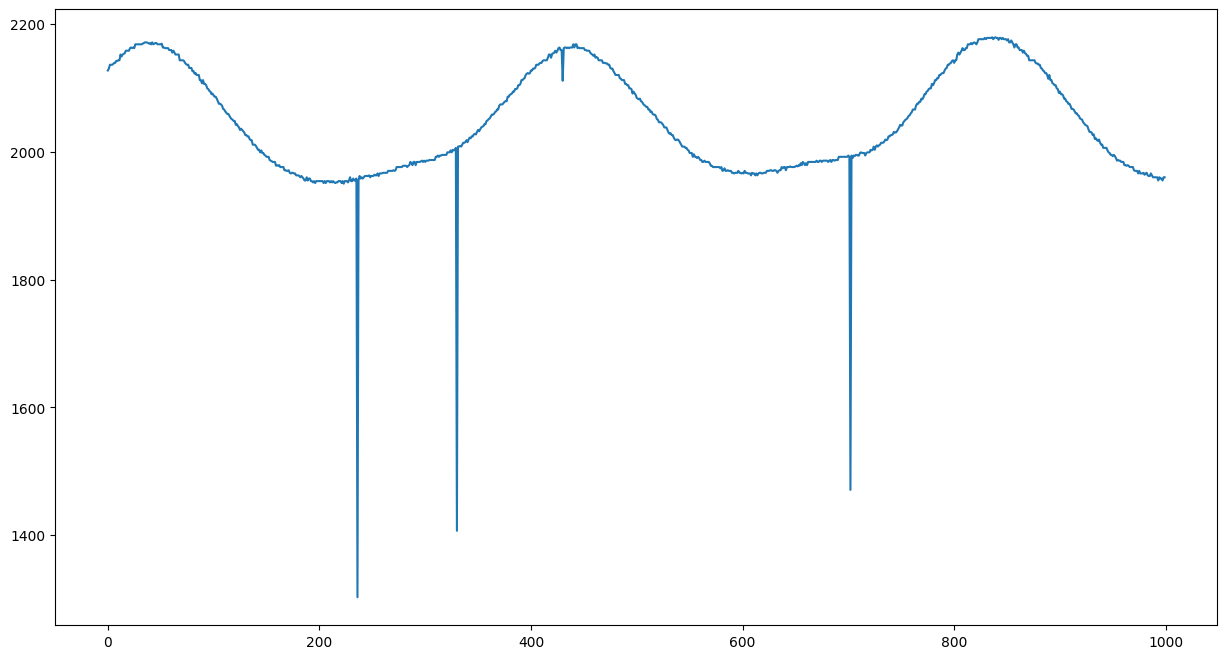

In [ ]:
import numpy as np
# 設定需要的參數到ppg_data變數
ppg_data = jsonfile['data_PPG']


# 將ppg_data轉換成array
ppg_array = np.array(ppg_data)



# ppg信號繪圖
plt.figure(figsize=(15, 8))
plt.plot(ppg_array[5000:6000])
plt.show()



# 刪除資料為0的數據

5000
308000
305700


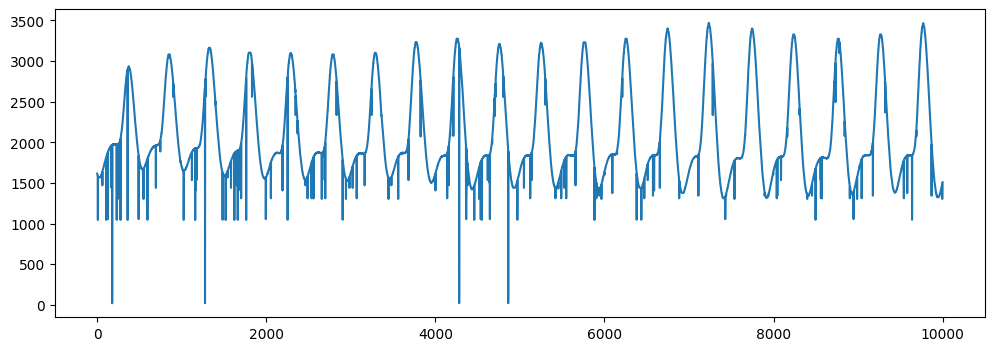

In [ ]:
# 數據前幾秒沒有偵測到
x = 0
for i in ppg_data:
    if i == 0:
        x += 1

print(x)


while x > 0:
    ppg_data.remove(0)
    x -= 1

print(len(ppg_data))

print(len(ppg_data))
ppg_array2 = np.array(ppg_data)

# ppg信號繪圖
plt.figure(figsize=(12, 4))
plt.plot(ppg_array2[0:10000])
plt.show()

# 濾波

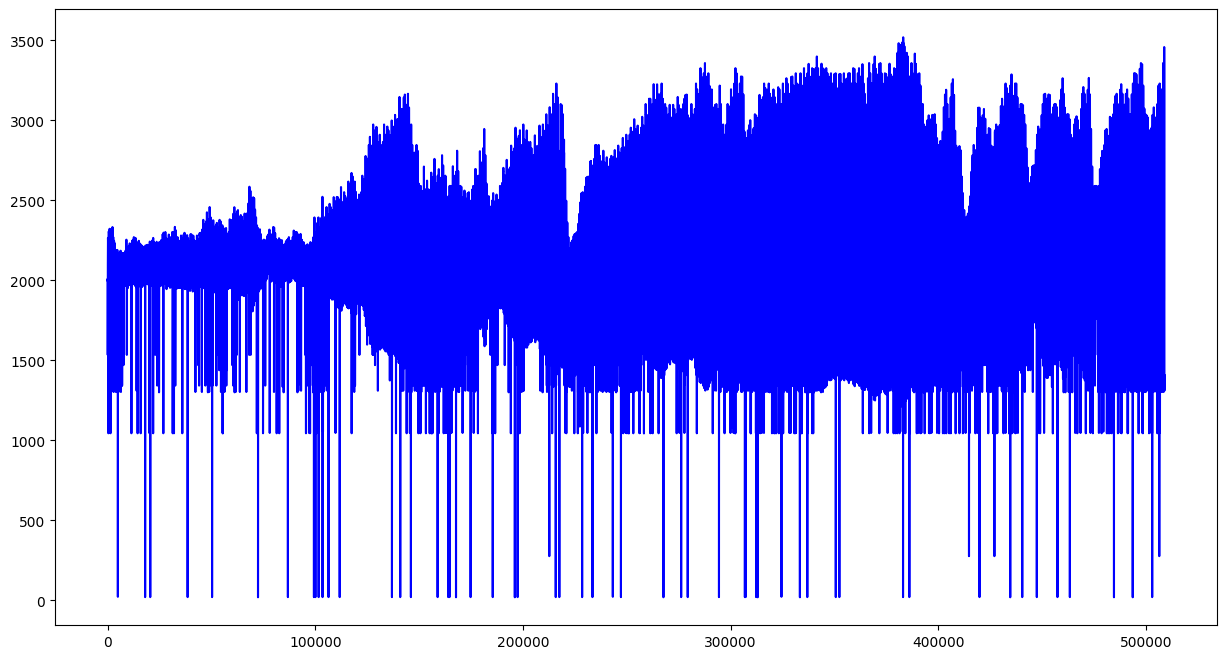

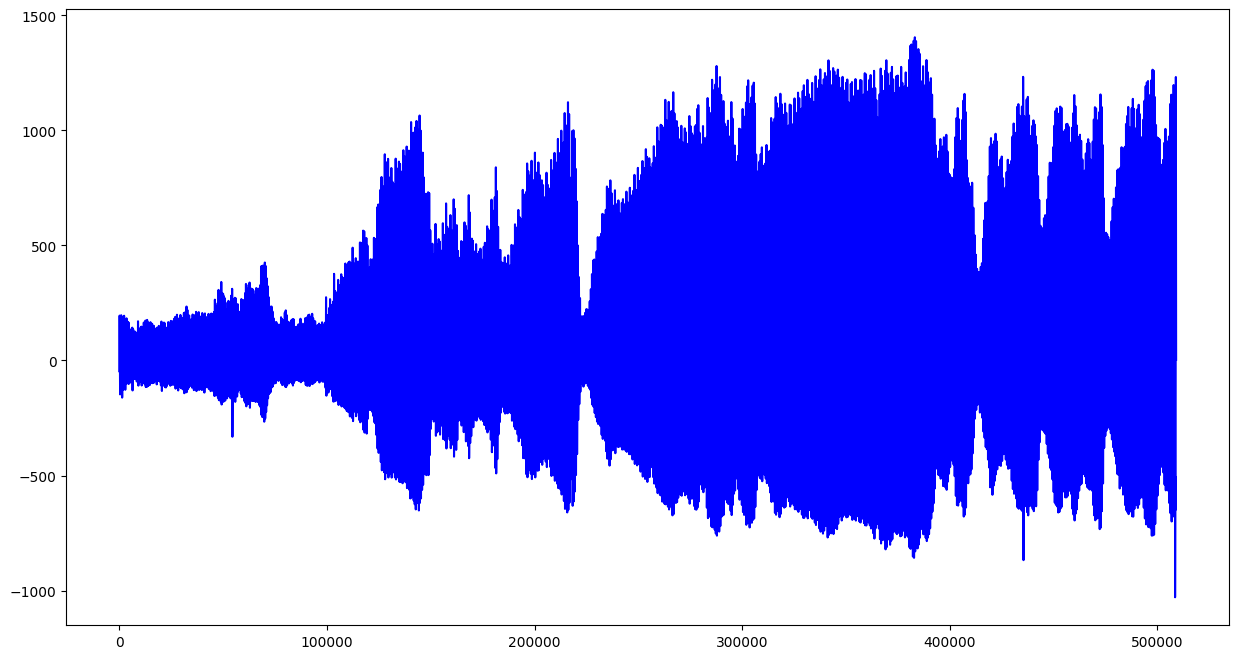

In [ ]:
# 濾波
# 使用巴特沃斯濾波器(Butterworth Filter)

fs = 1000 # 樣本率(Hz)
lowcut = 0.67 # 通帶低頻(Hz)
highcut = 8.0 # 通帶高頻(Hz)
order = 5 # 濾波器的階數


# 設計巴特沃斯帶通濾波器
def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a

def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order)
    y = filtfilt(b, a, data)
    return y

# 開始濾波
ppg_data = butter_bandpass_filter(ppg_array, lowcut, highcut, fs, order=3)


# 繪圖
plt.figure(figsize=(15, 8))
plt.plot(ppg_array, color='blue')
plt.show()


plt.figure(figsize=(15, 8))
plt.plot(ppg_data, color='blue')
plt.show()


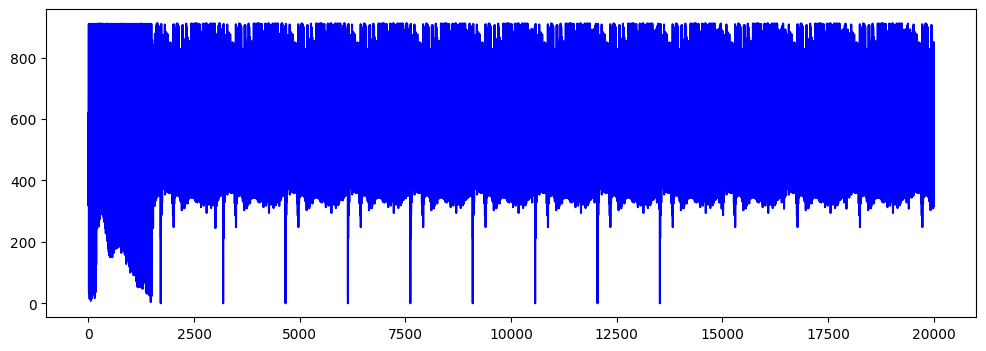

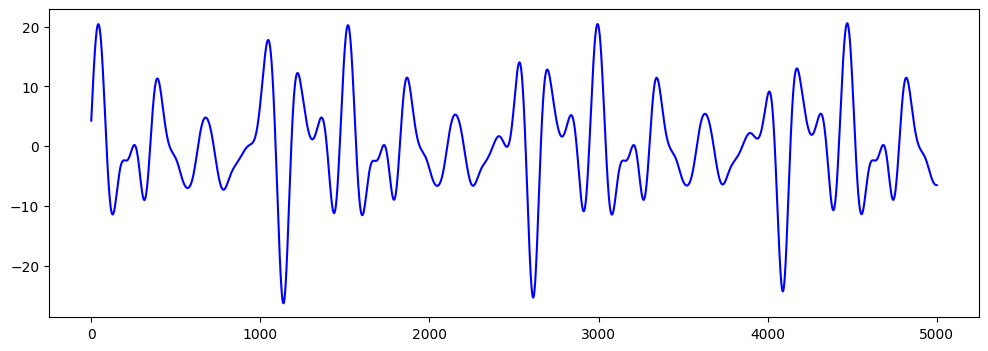

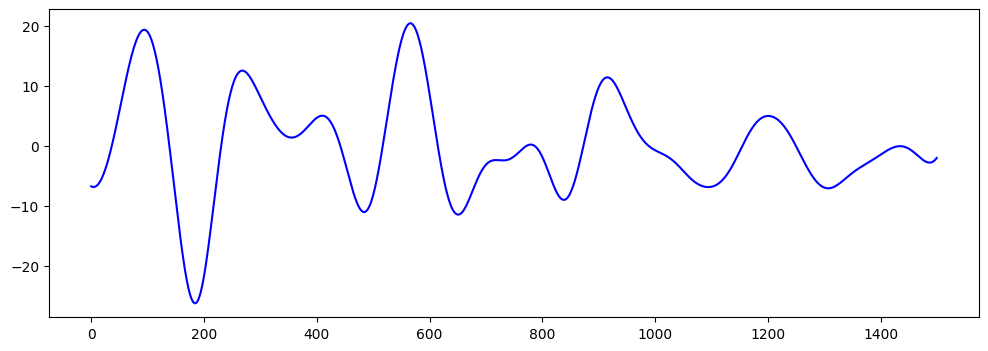

In [ ]:
plt.figure(figsize=(12, 4))
plt.plot(ppg_array[0: 20000], color='blue')
plt.show()


plt.figure(figsize=(12, 4))
plt.plot(ppg_data[5000: 10000], color='blue')
plt.show()

plt.figure(figsize=(12, 4))
plt.plot(ppg_data[3000: 4500], color='blue')
plt.show()

In [ ]:
# 根據提供的採樣率和要求的時長（5秒），計算每個段落應包含的數據點數量
sampling_rate = 1000  # 1000Hz
segment_length_seconds = 5  # 5秒
segment_length_points = sampling_rate * segment_length_seconds  # 每個段落應包含的數據點數量

ppg_data_noraml = ppg_data.tolist()
# ppg_data_noraml = ppg_data.tolist()

# 分割PPG訊號數據
segments = [ppg_data_noraml [i: i + segment_length_points] for i in range(0, len(ppg_data_noraml), segment_length_points)]

# 計算總共分割成多少段
total_segments = len(segments)

# 如果最後一段的長度不足5000，顯示其長度
last_segment_length = len(segments[-1]) if segments else 0

total_segments, last_segment_length


(102, 4000)

<function matplotlib.pyplot.show(close=None, block=None)>

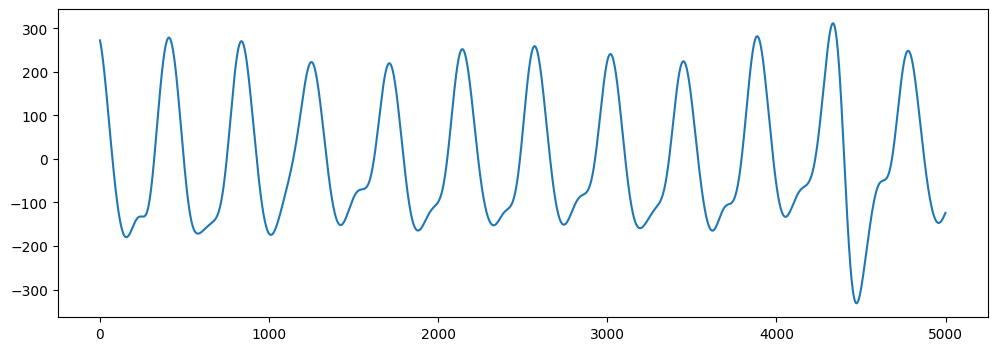

In [ ]:
plt.figure(figsize=(12, 4))
plt.plot(segments[10])
plt.show

In [ ]:
# 移除最後一筆未滿5000的資料
if len(segments[-1]) != 5000:
    segments.pop()
len(segments)

101

In [ ]:
# 個別做MinMax
list1 = []
for i in range(len(segments)):
    semgents = np.array(segments[i])
    scaler = MinMaxScaler()
    ppg_data_noramalized = scaler.fit_transform(semgents.reshape(-1, 1)).flatten()
    list1.append(ppg_data_noramalized)
list1

[array([0.32025848, 0.32051187, 0.32082107, ..., 0.70876388, 0.71405825,
        0.71926492]),
 array([0.75903765, 0.76502163, 0.7708921 , ..., 0.17173862, 0.17217266,
        0.17263117]),
 array([0.12709218, 0.1276102 , 0.12814845, ..., 0.96473521, 0.96379709,
        0.96263584]),
 array([1.        , 0.99826037, 0.99628251, ..., 0.06193833, 0.05679543,
        0.0518155 ]),
 array([0.13585728, 0.13175569, 0.12780448, ..., 0.14097494, 0.14146605,
        0.14202669]),
 array([0.1249732 , 0.1256148 , 0.12631473, ..., 0.08025434, 0.07663579,
        0.07314708]),
 array([0.09283585, 0.09001428, 0.0873058 , ..., 0.24642175, 0.24079347,
        0.23524465]),
 array([0.22438463, 0.21849397, 0.21269391, ..., 0.71938411, 0.71070963,
        0.70197779]),
 array([0.71297663, 0.70413154, 0.69524253, ..., 0.1828559 , 0.18370034,
        0.18452088]),
 array([0.21710175, 0.21760322, 0.21809173, ..., 0.88019558, 0.87711991,
        0.87386826]),
 array([0.93887293, 0.93589385, 0.93277522, ..., 0

In [ ]:
# 儲存成檔案
if len(segments[-1]) != 625:
    segments.pop()
    print('最後一筆已移除')
    # 將分割後的數據保存為JSON文件
    output_path = f'/content/drive/MyDrive/Colab Notebooks/ppgdata/mimic_perform_af_001_data1.json'
    with open(output_path, 'w') as outfile:
        json.dump(segments, outfile)
        print(f'儲存成功 檔案{times}')
        print(f'剩餘{len(segments)}筆資料')
else:
    # 將分割後的數據保存為JSON文件
    output_path = f'/content/drive/MyDrive/Colab Notebooks/ppgdata/mimic_perform_af_data1.json'
    with open(output_path, 'w') as outfile:
        json.dump(segments, outfile)
        print(f'儲存成功 檔案{times}')



最後一筆已移除
儲存成功 檔案
剩餘240筆資料


# 將所有檔案統整到一個檔案

In [ ]:
import os
import json

# 設定資料夾路徑
data_folder = '/content/drive/MyDrive/Colab Notebooks/ppgdata'


jsonData = []

# 遍歷資料夾中的所有檔案
for filename in os.listdir(data_folder):
    # 確保只處理JSON檔案
    if filename.endswith('.json'):
        file_path = os.path.join(data_folder, filename)
        # 打開並讀取JSON檔案
        with open(file_path, 'r', encoding='utf-8') as file:
            data = json.load(file)
            # 現在可以對data變數進行操作了
            jsonData.append(data)
            print(f"Loaded {filename} with data: {data}")
            print(f"jsonData have {len(jsonData)} file")

# 寫入成一個json檔
with open('/content/drive/MyDrive/Colab Notebooks/ppgdata/allFile.json', 'w') as file:
    json.dump(jsonData, file)


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
with open('/content/drive/MyDrive/Colab Notebooks/ppgdata/allFile.json', 'r') as jsonfile:
    file = json.load(jsonfile)

print(len(file))

25


In [ ]:
# 將各個不同檔案的資料統合成一個list
list1 = file[0]
count = len(file[0])

for i in range(1, len(file)):
    for j in range(len(file[i])):
        list1.append(file[i][j])
    print(f'{count} + {len(file[i])} = {len(list1)}')
    count += len(file[i])

print(count)

56 + 71 = 127
127 + 69 = 196
196 + 111 = 307
307 + 101 = 408
408 + 54 = 462
462 + 95 = 557
557 + 87 = 644
644 + 68 = 712
712 + 59 = 771
771 + 45 = 816
816 + 82 = 898
898 + 71 = 969
969 + 69 = 1038
1038 + 77 = 1115
1115 + 80 = 1195
1195 + 79 = 1274
1274 + 69 = 1343
1343 + 76 = 1419
1419 + 78 = 1497
1497 + 79 = 1576
1576 + 103 = 1679
1679 + 62 = 1741
1741 + 71 = 1812
1812 + 72 = 1884
1884


In [ ]:
# 寫入成一個json檔
with open('/content/drive/MyDrive/Colab Notebooks/ppgdata/allFiles.json', 'w') as file:
    json.dump(list1, file)

In [ ]:
# 檢查資料數量
with open('/content/drive/MyDrive/Colab Notebooks/ppgdata/allFiles.json', 'r') as jsonfile:
    file = json.load(jsonfile)

print(len(file))

1884
